In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [53]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error as mse

mapping = {0: "Least Squares", 1: "Lasso", 2:"Ridge", 3:"Elastic Net"}

index = np.linspace(1, 24, 24)
X = np.zeros((24, 11))

for i in range(11):
    X[:, i] = np.power(index, i)

def run_models(y):
    least_squares = linear_model.LinearRegression().fit(X, y)
    lasso = linear_model.Lasso().fit(X, y)
    ridge = linear_model.Ridge().fit(X, y)
    elastic = linear_model.ElasticNet().fit(X, y)

    least_squares_pred = least_squares.predict(X)
    lasso_pred = lasso.predict(X)
    ridge_pred = ridge.predict(X)
    elastic_pred = elastic.predict(X)

    return pd.DataFrame(data=[least_squares_pred, lasso_pred, ridge_pred, elastic_pred]).T.rename(columns=mapping), \
           pd.DataFrame(data=[least_squares.coef_, lasso.coef_, ridge.coef_, elastic.coef_]).T.rename(columns=mapping), \
           pd.DataFrame(data=[mse(y, least_squares_pred), mse(y, lasso_pred), mse(y, ridge_pred), mse(y, elastic_pred)]).T.rename(columns=mapping)

<h1>Temperature Data</h1>

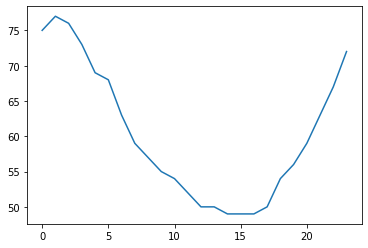

In [54]:
temp = np.array([75,77,76,73,69,68,63,59,57,55,54,52,50,50,49,49,49,50,54,56,59,63,67,72])

plt.plot(temp)

In [55]:
predictions, coefficients, errors = run_models(temp)

C:\Users\chris\DataspellProjects\CRASA-NIJC\venv\uwu\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.606e+01, tolerance: 2.145e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\chris\DataspellProjects\CRASA-NIJC\venv\uwu\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.69621e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\chris\DataspellProjects\CRASA-NIJC\venv\uwu\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.325e+01, tolerance: 2.145e-01
  model = cd_fast.enet_coo

In [56]:
predictions

,Least Squares,Lasso,Ridge,Elastic Net
0,74.980834,75.672763,75.729830,76.059864
1,77.190889,74.813551,76.136693,75.043279
2,75.578633,73.458753,75.492902,73.556431
3,73.034617,71.676952,73.464311,71.668479
4,70.015444,69.541680,70.293163,69.453032
5,66.588873,67.131536,66.550338,66.988210
6,63.017635,64.530220,62.845116,64.356604
7,59.700666,61.826434,59.614290,61.645120
8,56.953602,59.113603,57.033923,58.944634
9,54.865040,56.489334,55.044973,56.349423


In [57]:
coefficients

,Least Squares,Lasso,Ridge,Elastic Net
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,2.989706e+01,-0.000000e+00,3.241997e-01,-1.934075e-01
2,-1.894137e+01,-3.095035e-01,3.704667e-01,-2.980290e-01
3,6.309327e+00,9.504506e-03,-7.091638e-02,9.765975e-03
4,-1.297824e+00,1.803915e-04,-6.997972e-02,1.665940e-04
5,1.689235e-01,1.991129e-06,2.143311e-02,1.608444e-06
6,-1.406527e-02,-1.054194e-08,-2.667418e-03,-1.849481e-08
7,7.450447e-04,-1.762444e-09,1.782699e-04,-1.822955e-09
8,-2.424469e-05,-8.244823e-11,-6.718712e-06,-7.691089e-11
9,4.414467e-07,-3.033693e-12,1.348149e-07,-2.580946e-12


In [58]:
errors

,Least Squares,Lasso,Ridge,Elastic Net
0,0.278469,1.533217,0.361983,1.373144


<h1>Corrupted Temperature Data</h1>

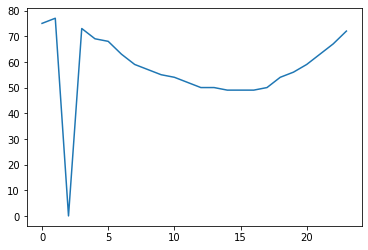

In [59]:
corr_temp = temp.copy()
corr_temp[2] = 0

plt.plot(corr_temp)

In [60]:
corr_predictions, corr_coefficients, corr_errors = run_models(corr_temp)

C:\Users\chris\DataspellProjects\CRASA-NIJC\venv\uwu\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.246e+03, tolerance: 5.286e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\chris\DataspellProjects\CRASA-NIJC\venv\uwu\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.69621e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\chris\DataspellProjects\CRASA-NIJC\venv\uwu\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.246e+03, tolerance: 5.286e-01
  model = cd_fast.enet_coo

In [61]:
corr_predictions

,Least Squares,Lasso,Ridge,Elastic Net
0,78.509044,61.487485,70.883741,61.533413
1,58.610808,61.365843,57.204606,61.404803
2,37.800325,61.128624,50.683426,61.157829
3,45.644916,60.752885,52.166857,60.770902
4,63.492211,60.221612,58.152970,60.228192
5,73.428300,59.525065,64.118235,59.520965
6,70.891483,58.662269,66.825273,58.649062
7,61.237051,57.642630,65.292750,57.622495
8,52.262275,56.487601,60.597623,56.463107
9,48.664610,55.232320,54.943006,55.206200


In [62]:
corr_coefficients

,Least Squares,Lasso,Ridge,Elastic Net
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,4.193838e+02,0.000000e+00,-6.630694e+00,0.000000e+00
2,-3.596352e+02,-2.836784e-02,-9.002486e+00,-3.132722e-02
3,1.430911e+02,-5.502118e-03,3.555985e+00,-5.217621e-03
4,-3.143079e+01,1.170550e-04,-2.404496e-01,1.118073e-04
5,4.166292e+00,6.734885e-06,-6.800707e-02,6.635561e-06
6,-3.475167e-01,1.869762e-07,1.473224e-02,1.858275e-07
7,1.837059e-02,3.069786e-09,-1.257036e-03,3.076443e-09
8,-5.973191e-04,-2.748786e-11,5.583324e-05,-2.629343e-11
9,1.089965e-05,-5.540842e-12,-1.276730e-06,-5.480089e-12


In [63]:
corr_errors

,Least Squares,Lasso,Ridge,Elastic Net
0,119.051884,187.138747,153.525628,187.168966


<h1>Variance</h1>